In [1]:
# 1. Forecast with numeric timeseries data
# 1.1 Roaming Data의 load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#공개된 Roaming Dataset을 읽고, 중간 중간 나온것을 합친다.
rm1 = pd.read_csv("./corona_contest_data_0406/Roaming_data.csv",encoding="utf-8")
rm2 = pd.read_csv("./corona_contest_data_0429/Roaming_data.csv",encoding="utf-8")
rm = pd.concat([rm1, rm2], ignore_index=True, sort=False)

# 합친 Dataset의 내용 확인
rm

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3
...,...,...,...,...,...
217800,20200401,vn,20200330,20200401,3
217801,20200401,vn,20200331,20200331,20
217802,20200401,vn,20200331,20200401,6
217803,20200401,vn,20200401,20200401,45


In [2]:
# 1.2 Roaming Data에 대한 EDA
# 1.2.1 도착일을 기준으로 입국자(로밍등록자)의 합산

ar = pd.DataFrame(rm.groupby('arrival')['count'].sum())
ar['date'] =  ar.index.astype('object')
#date column을 datetime 으로 casting 한다.
ar['date'] =  pd.to_datetime(ar['date'], format='%Y%m%d')

# 날자별 입국자(로밍등록자) 정리 dataset 확인
ar

,count,date
arrival,,
20191031,91,2019-10-31
20191101,36,2019-11-01
20191102,120,2019-11-02
20191103,159,2019-11-03
20191104,179,2019-11-04
...,...,...
20200424,711,2020-04-24
20200425,463,2020-04-25
20200426,447,2020-04-26


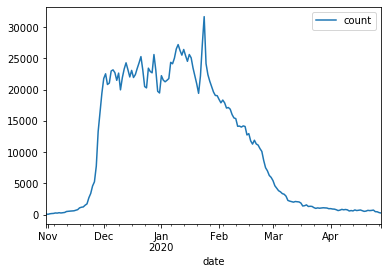

In [3]:
# 1.2.2 입국자(로밍등록자) 추세 chart 확인
ar.plot(x='date',y='count')

In [4]:
# 1.3 Roaming Data의 전처리
# 1.3.1 iso 별로 재배열

ar_iso = pd.DataFrame(rm.groupby(['arrival','iso'])['count'].sum())
rows = []
date = None
r = None
for row in ar_iso.iterrows():
  if date == row[0][0]:
    pass
  else:
    if not r is None:
      rows.append(r)
    r = {}

  r['arrival'] = row[0][0]
  r[row[0][1]] = row[1][0]
  date = row[0][0]
rows.append(r)
ds_iso = pd.DataFrame(rows)
ds_iso.fillna(0, inplace=True)
ds_iso = ds_iso.set_index('arrival')
ds_iso['total'] = ar['count']
ds_iso.index =  ds_iso.index.astype('object')
#index을 datetime 으로 casting 한다.
ds_iso.index =  pd.to_datetime(ds_iso.index, format='%Y%m%d')
ds_iso

,ae,at,cn,de,hk,jp,kh,kw,la,mm,...,tc,ls,td,mr,to,ws,gm,ye,ml,total
arrival,,,,,,,,,,,,,,,,,,,,,
2019-10-31,3.0,3.0,20,3.0,6.0,6,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91
2019-11-01,0.0,0.0,6,3.0,0.0,3,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
2019-11-02,0.0,0.0,26,6.0,3.0,9,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120
2019-11-03,3.0,3.0,30,0.0,12.0,14,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,159
2019-11-04,12.0,3.0,40,3.0,3.0,10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,0.0,12.0,84,34.0,19.0,157,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,711
2020-04-25,0.0,9.0,39,15.0,4.0,111,21.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,463
2020-04-26,0.0,0.0,42,14.0,10.0,98,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447


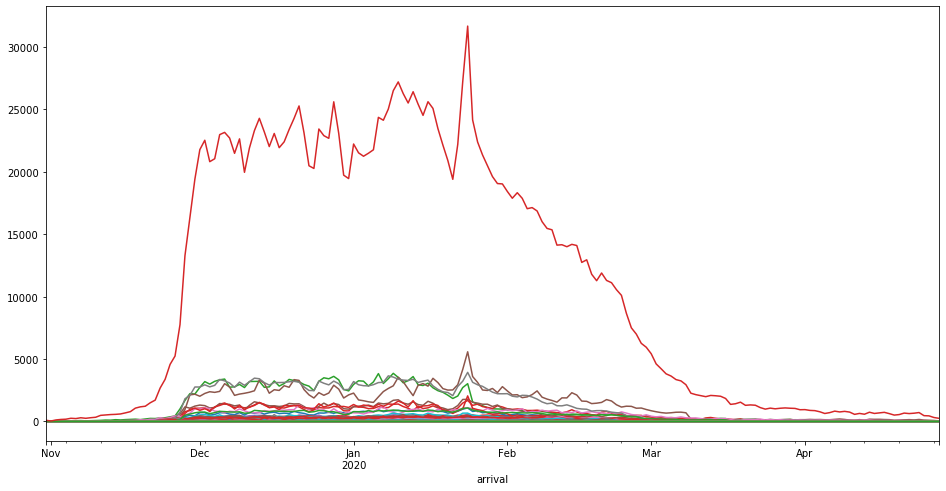

In [5]:
ds_iso.plot(legend=False,figsize=(16,8))

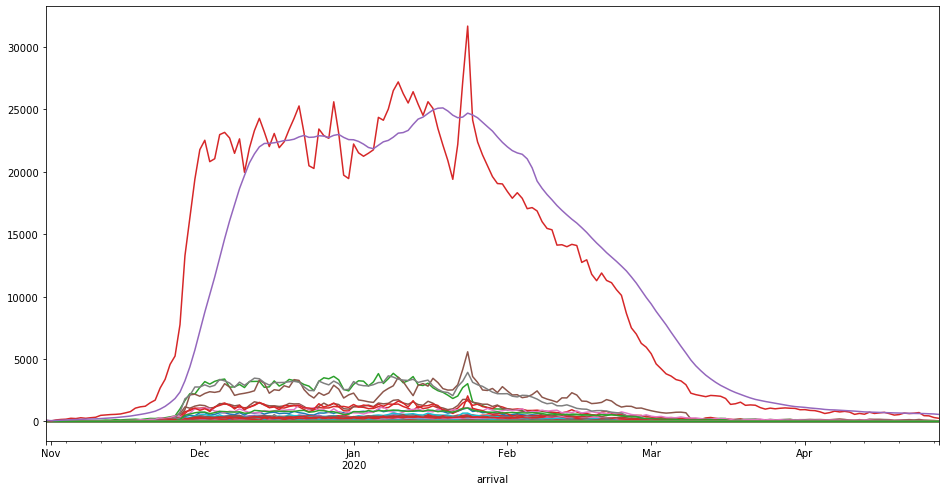

In [6]:
# 1.3.2 2주 (14일) 평균 추세 추가.
raw_ds = ds_iso.copy()
raw_ds['arrival_14ma'] = raw_ds['total'].rolling(window=14, min_periods=0).mean()
raw_ds.plot(legend=False,figsize=(16,8))

In [85]:
# 1.3.3 Trainingset의 구성

# Time-series CNN을 적용하기 위한 전처리
# 1D Convolution을 적용하기 위해..

import numpy as np

# window를 30일로 설정 -> 그냥 잡은 수치
window = 30
#입력 feature 개수.
size = len(raw_ds.columns) - 1 # totoal column 제외
#향후 15일 예측
forecast_days = 15


train_org_y = raw_ds['total'].to_numpy()
data = (raw_ds.drop(columns=['total'])).to_numpy()

train_x = []
train_y = []

for i in range(data.shape[0]-window-forecast_days + 1):
    sub_x = []
    for j in range(window):
        sub_x.append(data[i+j,:])
    train_x.append(sub_x)

    sub_y = []
    for z in range(forecast_days):
        sub_y.append(train_org_y[i + window + z])
    train_y.append(sub_y)

#train_x ,train_y의 준비
train_x = np.asarray(train_x)
train_x = train_x.reshape(-1,window,size)
train_y = np.asarray(train_y)

test_x = data[data.shape[0]-window:data.shape[0],:]

In [86]:
#train_x ,train_y의 내용 확인.
train_x.shape, train_y.shape, test_x.shape

((137, 30, 174), (137, 15), (30, 174))

In [87]:
# 1.4 CNN model 구성 

# custom R2-score metrics for keras backend
from keras import backend as K

def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# 이게 최적의 layer 구성인지는 모름... 일반적/직관적으로 layer 설정 
import keras
from keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(128,4, input_shape=(window, size),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 4,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(32, 4,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dense(forecast_days))
model.add(Activation('linear'))

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['mae',r2])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 30, 128)           89216     
_________________________________________________________________
activation_12 (Activation)   (None, 30, 128)           0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 15, 128)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 15, 64)            32832     
_________________________________________________________________
activation_13 (Activation)   (None, 15, 64)            0         
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 7, 64)             0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 7, 32)            

In [89]:
# 1.5 model training
# 1.5.1 model training

class VerboseCallback(keras.callbacks.Callback):
    def __init__(self,epoch):
        self.epoch = epoch
        self.progress("learning:",0,[])
        
    def progress(self,text,current=0,log=None):
        pg = ['=' for i in range(current)] + ['.' for i in range(self.epoch-current)]
        print("\r" + str(text) + "[{}] {}/{} {}".format(''.join(pg),current,self.epoch, ('' if log is None else log)), end="", flush=True)
        if self.epoch-current == 0:
            print("")        
            
    def on_epoch_end(self, epoch, logs=None):
        self.progress("learning:",epoch+1,logs)
        
#학습 시작...
epochs=50
hist = model.fit(train_x, train_y, epochs=epochs,verbose=0, callbacks=[VerboseCallback(epochs)])

learning:[==================================================] 50/50 {'loss': 1901075.9671532847, 'mae': 810.783, 'r2': 0.9802262}7}}


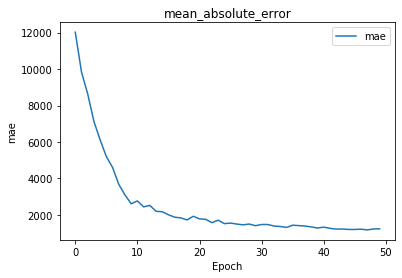

In [11]:
# 1.5.2 학습에 대한 mean_absolute_error 확인.

def plot_mae(hist):
  plt.plot(hist.history['mae'])
  plt.title('mean_absolute_error')
  plt.ylabel('mae')
  plt.xlabel('Epoch')
  plt.legend(['mae'], loc='upper right')
  plt.show()

plot_mae(hist)

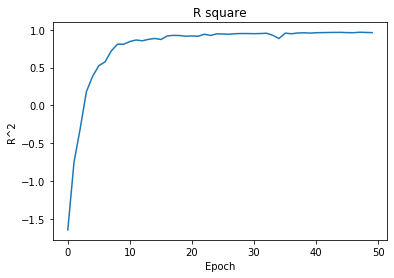

In [12]:
def plot_r2(hist):
  plt.plot(hist.history['r2'])
  plt.title('R square')
  plt.ylabel('R^2')
  plt.xlabel('Epoch')
  #plt.legend(['mae'], loc='upper right')
  plt.show()

plot_r2(hist) 

In [13]:
# 1.5.3 trainset에 의한 과거 data의 예측 입국자 count 
predit_y = model.predict(train_x)
predit_y,predit_y.shape

(array([[13650.165  , 13827.8955 , 13359.392  , ..., 16475.232  ,
         15946.899  , 16607.637  ],
        [17228.494  , 17530.695  , 16955.387  , ..., 20545.938  ,
         20281.521  , 20617.92   ],
        [20026.002  , 20508.805  , 20161.85   , ..., 23482.55   ,
         23876.488  , 23397.262  ],
        ...,
        [  747.8374 ,   702.5277 ,   632.5119 , ...,   478.5731 ,
           496.40598,   530.98987],
        [  703.2899 ,   667.84216,   604.37164, ...,   440.24878,
           477.17984,   500.927  ],
        [  684.3209 ,   655.69196,   581.9427 , ...,   437.6321 ,
           457.91757,   497.02377]], dtype=float32),
 (137, 15))

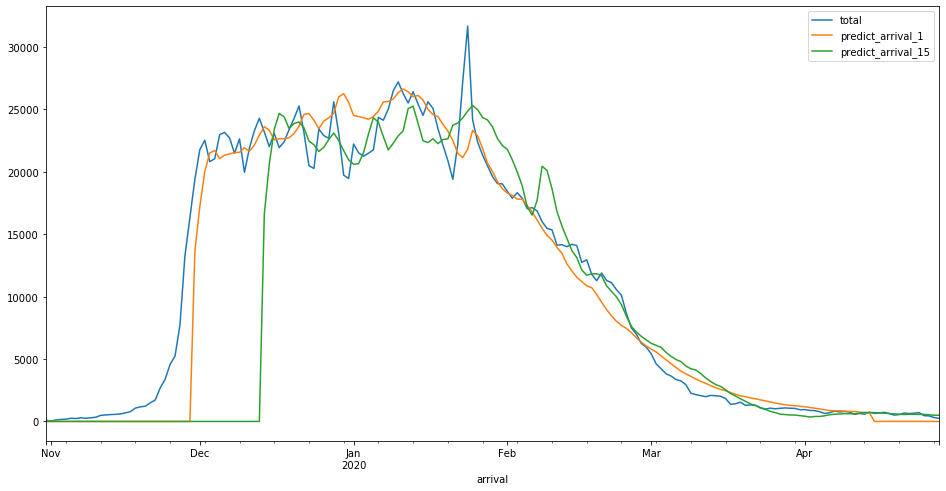

In [14]:
# 1.5.4 과거 Data에서 실등록자 count와 예측 count의 비교 

def compare_backdata(predit_y):
  predit = []
  for forecast in range(forecast_days):
    predit.append(list(np.concatenate((np.zeros(window+ forecast), predit_y[:,forecast],np.zeros(forecast_days-forecast-1)), axis=0)))
  # 예측치를 chart에 같이 그려서 확인
  comp_ds = raw_ds.copy()
  comp_ds['predict_arrival_1'] = predit[0]
  comp_ds['predict_arrival_15'] = predit[14]
  comp_ds.plot(y=['total','predict_arrival_1','predict_arrival_15'],figsize=(16,8))

compare_backdata(predit_y)

In [15]:
# 1.6  향후 15일 예측
# 1.6.1 testset (마지막 30일)의 inference

# trainset의 마지막 날에서 15일까지의 예측
# 마지막 30일치 정보를 input으로...

test_x = test_x.reshape(-1,window,size)
predit_y = model.predict(test_x)
predit_y, predit_y.shape

(array([[433.0732 , 462.9803 , 398.2886 , 412.92743, 401.95267, 387.4241 ,
         363.1494 , 370.9116 , 386.37225, 385.51062, 334.80365, 322.07352,
         264.24548, 338.26373, 286.97296]], dtype=float32),
 (1, 15))

,date,roaming register forecate,immigrantion forecast
0,2020-04-29,433.073212,1804
1,2020-04-30,462.980286,1929
2,2020-05-01,398.288605,1659
3,2020-05-02,412.927429,1720
4,2020-05-03,401.952667,1674
5,2020-05-04,387.424103,1614
6,2020-05-05,363.149414,1513
7,2020-05-06,370.911591,1545
8,2020-05-07,386.372253,1609
9,2020-05-08,385.510620,1606


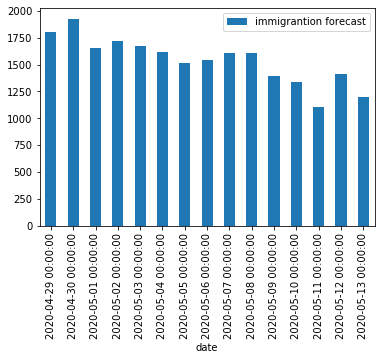

In [16]:
# 1.6.2 로밍등록자 예측 Count에서 실입국자 보정 처리 및 결과 표출
def display_result(predit_y):
  predic_ds = []
  # 로밍등록자는 실 입국자의 약 24%에 해당되므로.. 이를 보정 처리 한다.
  #predit_y1 = predit_y * 100/24
  from datetime import datetime, timedelta
  last_date = raw_ds.index[-1]
  #print('============================================================')
  for predict_count in predit_y[0]:
    last_date += timedelta(days=1)
    #print('Forecast of the number of immigrants on ' +str(last_date)[10]+ ':',int(predict_count))
    predic_ds.append({'date':last_date,'roaming register forecate':predict_count, 'immigrantion forecast':int(predict_count * 100/24)})
  #print('============================================================')

  predic_ds = pd.DataFrame(predic_ds)
  predic_ds.plot(x='date',y='immigrantion forecast',kind='bar')
  return predic_ds

display_result(predit_y)

In [17]:

# 	2.1 News Data의 load

# 뉴스 기사 정보를 읽어서... 나뉘어 있는 Dataset을 합친다.
ns1 = pd.read_excel("./corona_contest_data_0406/NewsList.xls")
ns2 = pd.read_excel("./corona_contest_data_0429/NewsList.xls")
ns =pd.concat([ns1, ns2], ignore_index=True, sort=False)

In [18]:
ns

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
...,...,...,...,...,...,...,...,...
103822,XWFB2020040900020,"Ching Ming remembrance, home country forever! ...",http://wsjkw.sh.gov.cn/xwfb/20200404/2f54e0e14...,2020-04-09 16:05:21.0,2020-04-04 00:00:00,Shanghai Municioal Health Commission,COVID-19,Viral
103823,ZWYW2020041000002,Guangdong Provincial Health Commission notifie...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-10 18:00:45.0,2020-04-10 00:00:00,Health Commission of Guangdong Province,Dengue fever,Viral
103824,ZWYW2020041500002,Guangdong Provincial Health Commission announc...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-15 23:01:04.0,2020-04-15 00:00:00,Health Commission of Guangdong Province,Influenza,Viral
103825,ZWYW2020041500003,Guangdong Provincial Health Commission release...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-15 23:01:13.0,2020-04-15 00:00:00,Health Commission of Guangdong Province,Influenza,Viral


In [19]:
# 	2.2 News Data에 대한 EDA
# 		2.2.1 게시일을 기준으로 News buzz의 합산

cov_news = ns.loc[ns['감염병명'] == 'COVID-19']
cov_news['게시일자'] =  cov_news['게시일자'].str[:10]
cov_buz = pd.DataFrame(cov_news.groupby('게시일자')['감염병명'].count())
cov_buz = cov_buz.loc[cov_buz.index >= '2019-10-31']
cov_buz['date'] = pd.to_datetime(cov_buz.index, format='%Y-%m-%d')
cov_buz = cov_buz.rename(columns={"감염병명":"buz_count"})
cov_buz

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,buz_count,date
게시일자,,
2019-12-01,1,2019-12-01
2019-12-14,2,2019-12-14
2019-12-30,3,2019-12-30
2019-12-31,5,2019-12-31
2020-01-02,1,2020-01-02
...,...,...
2020-04-26,1176,2020-04-26
2020-04-27,1353,2020-04-27
2020-04-28,999,2020-04-28


In [20]:
# 		2.2.2 하루 최대 buzz count 추출

max_buz_per_day = cov_buz['buz_count'].max()
max_buz_per_day

1948

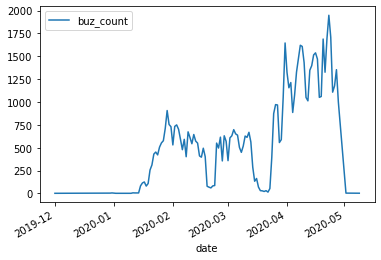

In [21]:
# 		2.2.3 News buzz 추세 Chart

cov_buz.plot(x='date',y='buz_count')

In [22]:
# 	2.3 News Data의 전처리
#		2.3.1 News Data의 doc2vec 처리

!pip install nltk
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

You should consider upgrading via the 'c:\program files\python36\python.exe -m pip install --upgrade pip' command.
unable to import 'smart_open.gcs', disabling that module


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\똘마니\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#			2.3.1.1 document의 tokenize & tagging
# 실 Contents는 사용하지 않고 title만 doc2vec 처리...
tagged_data = []
for row in cov_news.iterrows():
    file_name = row[1][0]
    title = str(row[1][1])
    pub_datetime = row[1][4]
    tagged_data.append(TaggedDocument(words=word_tokenize(title.lower()), tags=[file_name]))
    
len(tagged_data)

73752

In [24]:
#			2.3.1.2 doc2vec model training
# 시간 무지 걸림... 돌리고 커피 한잔 마시기.

max_epochs = 10 # 이건 나중에 100 정도로 수정...
vec_size = 40
alpha = 0.025

d2v_model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
d2v_model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    d2v_model.train(tagged_data,
                total_examples=d2v_model.corpus_count,
                epochs=d2v_model.epochs )
    # decrease the learning rate
    d2v_model.alpha -= 0.0002
    # fix the learning rate, no decay
    d2v_model.min_alpha = d2v_model.alpha

d2v_model.save("d2v.model")

print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [25]:
# doc2vec 모델 학습 결과 확인..
from gensim.models.doc2vec import Doc2Vec

d2v_model= Doc2Vec.load("d2v.model")

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(d2v_model.docvecs['AFRO2020013100001'])

[ 1.5899324  -0.9505449  -0.71560574 -0.0195605   1.4658185   0.7353485
  0.43121096 -1.1976597  -0.5540689   0.36520842  0.58429503 -0.02127443
  0.64430624  0.39444605 -0.00456798 -0.48744684  0.43840924  1.1083639
  0.47498688 -0.9385767  -0.36641908 -1.9920175   0.87176263 -0.15177813
 -0.6999413  -0.05109303 -0.16004598 -0.7191546  -0.07885338  1.1049931
 -1.3485744  -0.29243097  1.697398    0.5157587  -0.33968624  0.78039724
 -0.7693161   0.35581136  0.9500857  -0.8056198 ]


In [26]:
#		2.3.4 원시(origin) Trainset의 구성

# doc2vec을 feature로 하는 원시 학습셋을 구성한다.
# 이때, 입국일자을 기준으로 Set을 만드는데...
# 입국일에 news가 없을 때도 있어서, 일관성 있는 양질의 학습셋이 되기는 어려울 듯...
# 준대로 해야지 어쩔 수 없음.

cov_news['게시일자'] = pd.to_datetime(cov_news['게시일자'], format='%Y-%m-%d')
news_metric = []
from datetime import datetime, timedelta
import numpy as np
# 날짜별 (1948,40) 구성
for row in ar.iterrows():
    date = row[1][1]#datetime(2019,12,31)
    selected_ns = cov_news.loc[cov_news['게시일자'] >= date].loc[cov_news['게시일자'] < (date + timedelta(days=1))]
    #print(date,selected_ns.shape)
    if selected_ns.shape[0] == 0:
        # news가 없는 경우..
        news_metric.append(np.zeros((max_buz_per_day,vec_size)))
    else:
        docv = []
        for nrow in selected_ns.iterrows():
            #print('tag name:',nrow[1][0])
            docv.append(d2v_model.docvecs[nrow[1][0]])
        for i in range(max_buz_per_day-selected_ns.shape[0]):
            docv.append(np.zeros(vec_size))
        news_metric.append(docv)
        
train_temp_x = np.asarray(news_metric)
train_temp_x.shape

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(181, 1948, 40)

In [27]:
# 학습셋의 내용 확인...
train_temp_x[162]

array([[-1.04109919, -0.74009651, -0.96773565, ...,  0.10713005,
         0.32129875,  0.14800593],
       [-0.20617315,  0.28714272,  0.05412487, ...,  0.69276702,
        -0.02397976,  0.15111877],
       [ 0.27188972, -0.19194433, -0.1824839 , ...,  0.43239722,
         0.03979034,  0.14363992],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [28]:
# 학습셋의 label... 원시 train_temp_y의 구성
train_temp_y = np.asanyarray(ar['count'])
train_temp_y.shape

(181,)

In [90]:
#	2.4 doc2vec에 의한 Regression Test (Not forecast)
#		2.4.1 doc2vec의 Timeseries model 구성

# 일단, news regression의 설명력을 확인하기 위해...원시 학습을 test 한다.
import keras
from keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(128,2, input_shape=(max_buz_per_day,vec_size),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 2,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(32, 2,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['mae',r2])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 1948, 128)         10368     
_________________________________________________________________
activation_16 (Activation)   (None, 1948, 128)         0         
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 974, 128)          0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 974, 64)           16448     
_________________________________________________________________
activation_17 (Activation)   (None, 974, 64)           0         
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 487, 64)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 487, 32)          

In [91]:
#		2.4.2 원시(origin) Trainset으로 model training

epochs=30
hist = model.fit(train_temp_x, train_temp_y, epochs=epochs,verbose=0, callbacks=[VerboseCallback(epochs)])

learning:[==============================] 30/30 {'loss': 65097145.12707182, 'mae': 6730.7554, 'r2': 0.314308}}}}


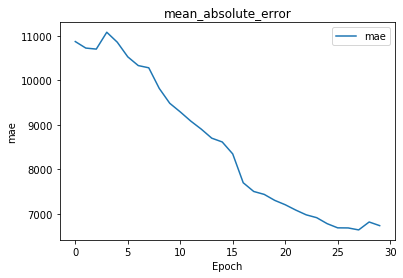

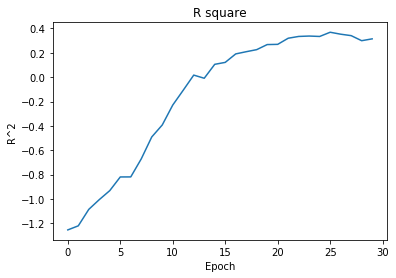

In [92]:
#		2.4.3 학습에 대한 mean_absolute_error 확인.

plot_mae(hist)
plot_r2(hist)

In [32]:
#		2.4.4 trainset에 의한 과거 data의 예측 입국자 count 
predit_y = model.predict(train_temp_x)
predit = predit_y.reshape(predit_y.shape[0])

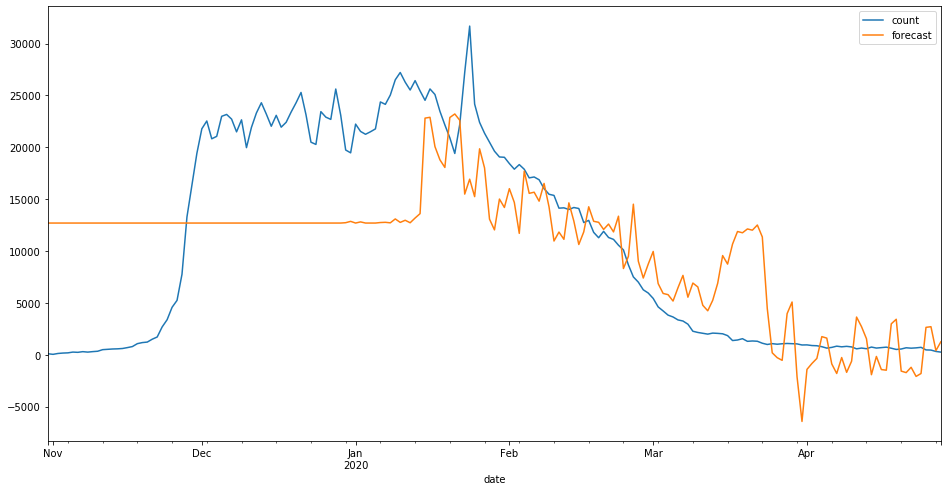

In [33]:
#		2.4.5 실등록자 count와 news기반 예측 count의 비교 chart
predit_result = ar.copy()
predit_result['forecast'] = predit
predit_result.plot(x='date',y=['count','forecast'],figsize=(16,8))

In [34]:
#	2.5 doc2vec에 의한 Forecast regression
#		2.5.1 doc2vec의 Window 적용 Timeseries Trainset의 구성

# 2D Convolution을 적용하여 마치 Image를 convolution 하듯이 학습할 것임
# window의 depth를 image의 channel 처럼 사용
# tensorflow는 image의 chennel을 channel_last로 사용, 
# 이것을 맞추기 위해 moveaxis 를 적용할 것임
# 여기 돌다가 colab 다운 잘됨... 다운 되면 처음부터 다시!

from numpy import moveaxis
# window를 30일로 설정 -> 그냥 잡은 수치
news_window = 30
#향후 15일 예측
news_forecast_days = 15

# 원시 trainset의 사용...
train_news_org_y = train_temp_y
data = train_temp_x

train_news_x = []
train_news_y = []

for i in range(data.shape[0]-news_window-news_forecast_days + 1):
    sub_x = []
    for j in range(news_window):
        sub_x.append(data[i+j,:,:])
    # change channels first to channels last format
    sub_x = np.asarray(sub_x)
    sub_x = moveaxis(sub_x, 0, 2)        
    train_news_x.append(sub_x)

    sub_y = []
    for z in range(news_forecast_days):
        sub_y.append(train_news_org_y[i + news_window + z])
    train_news_y.append(sub_y)

#train_news_x ,train_news_y 준비
train_news_x = np.asarray(train_news_x)
#train_news_x = train_news_x.reshape(-1,news_window,max_buz_per_day,vec_size)
train_news_y = np.asarray(train_news_y)

test_news_x = np.asarray(data[data.shape[0]-news_window:data.shape[0],:,:])
test_news_x = moveaxis(test_news_x, 0, 2) 

In [35]:
#train_news_x ,train_news_y (사실이거는 그냥 train_y와 동일...)의 내용 확인.
train_news_x.shape,  train_news_y.shape, test_news_x.shape

((137, 1948, 40, 30), (137, 15), (1948, 40, 30))

In [36]:
#		2.5.2 doc2vec Window 의 Timeseries model 구성

# 이게 최적의 layer 구성인지는 모름... 일반적/직관적으로 layer 설정 
# 정성적 비정형 데이터로 정량적 수치 데이터를 추정 하기 때문에... overfit 가능성이 큼
import keras
from keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

#keras.backend.set_image_data_format('channels_last')

model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(max_buz_per_day,vec_size,news_window)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
model.add(Dense(news_forecast_days))
model.add(Activation('linear'))

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['mae',r2])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1946, 38, 64)      17344     
_________________________________________________________________
activation_9 (Activation)    (None, 1946, 38, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 648, 12, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 646, 10, 32)       18464     
_________________________________________________________________
activation_10 (Activation)   (None, 646, 10, 32)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 215, 3, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20640)            

In [37]:
#		2.5.3 doc2vec의 Window 적용 Timeseries Trainset으로 model training

hist = model.fit(train_news_x, train_news_y, epochs=30,verbose=1)

Epoch 1/30
137/137 [==============================] - 25s 185ms/step - loss: 259849285.2555 - mae: 12761.0322 - r2: -1.7667
Epoch 2/30
137/137 [==============================] - 23s 171ms/step - loss: 257533237.6058 - mae: 12570.2451 - r2: -1.6643
Epoch 3/30
137/137 [==============================] - 23s 168ms/step - loss: 250808029.8978 - mae: 12510.8691 - r2: -2.2894
Epoch 4/30
137/137 [==============================] - 24s 177ms/step - loss: 247029123.3869 - mae: 12863.6875 - r2: -1.5846
Epoch 5/30
137/137 [==============================] - 29s 209ms/step - loss: 242303893.0219 - mae: 12695.4912 - r2: -1.5646
Epoch 6/30
137/137 [==============================] - 29s 209ms/step - loss: 236680639.0657 - mae: 12444.4785 - r2: -1.4631
Epoch 7/30
137/137 [==============================] - 24s 172ms/step - loss: 230623826.4526 - mae: 12351.8018 - r2: -1.6173
Epoch 8/30
137/137 [==============================] - 22s 160ms/step - loss: 225035895.9416 - mae: 12513.3721 - r2: -1.3765
Epoch 9/

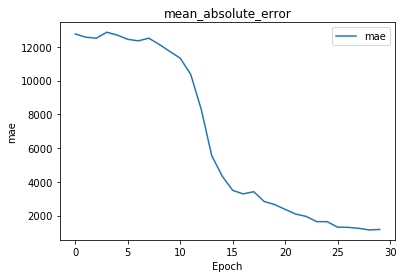

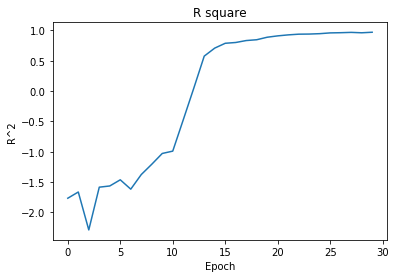

In [38]:
#		2.5.4 학습에 대한 mean_absolute_error 확인.

plot_mae(hist)
plot_r2(hist)

In [39]:
#		2.5.5 trainset에 의한 과거 data의 예측 입국자 추정 

predit_news_y = model.predict(train_news_x)
predit_news_y,predit_news_y.shape

(array([[23419.6     , 23634.932   , 23541.012   , ..., 23154.193   ,
         22694.227   , 22419.98    ],
        [23419.6     , 23634.932   , 23541.012   , ..., 23154.193   ,
         22694.227   , 22419.98    ],
        [23459.61    , 23674.133   , 23580.89    , ..., 23190.463   ,
         22730.412   , 22455.873   ],
        ...,
        [  586.1464  ,   561.17194 ,   567.58966 , ...,   265.04013 ,
           196.62015 ,   441.5799  ],
        [  476.3465  ,   471.83694 ,   451.73795 , ...,   177.21806 ,
           110.93519 ,   343.85706 ],
        [  399.37698 ,   403.96255 ,   366.52792 , ...,   115.56559 ,
            53.421284,   275.28702 ]], dtype=float32),
 (137, 15))

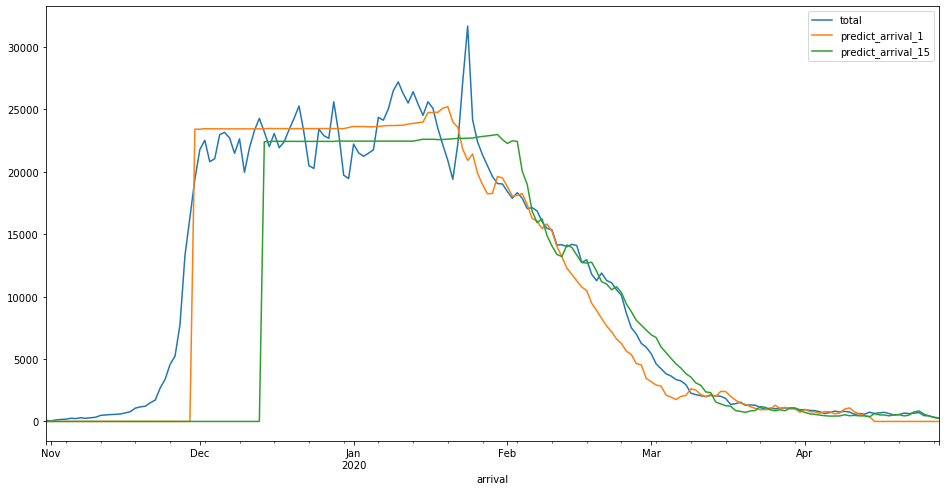

In [40]:
# window와 forecast_days에 의해 실제 날자와 차이나는 부분의 보정 처리...
compare_backdata(predit_news_y)

In [41]:
# 	2.6  향후 15일 예측
# 		2.6.1 testset (마지막 30일)의 inference

test_news_x = test_news_x.reshape(-1,max_buz_per_day,vec_size,news_window)
predit_y = model.predict(test_news_x)
predit_y,predit_y.shape

(array([[4444.367 , 4453.9385, 4599.4585, 4006.1294, 4163.065 , 4310.327 ,
         4466.7925, 4353.2236, 3785.8447, 3642.044 , 4257.7666, 3679.7458,
         3533.683 , 3640.666 , 4077.8018]], dtype=float32),
 (1, 15))

,date,roaming register forecate,immigrantion forecast
0,2020-04-29,4444.367188,18518
1,2020-04-30,4453.938477,18558
2,2020-05-01,4599.458496,19164
3,2020-05-02,4006.129395,16692
4,2020-05-03,4163.064941,17346
5,2020-05-04,4310.327148,17959
6,2020-05-05,4466.792480,18611
7,2020-05-06,4353.223633,18138
8,2020-05-07,3785.844727,15774
9,2020-05-08,3642.043945,15175


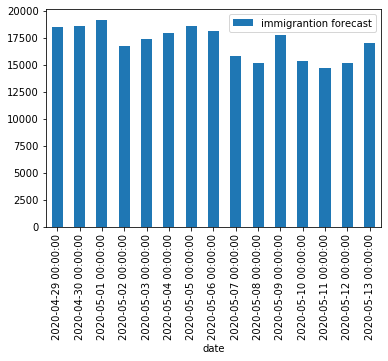

In [42]:
# 		2.6.2 로밍등록자 예측 Count에서 실입국자 보정 처리 및 결과 표출

display_result(predit_y)

In [49]:
# 이제 긴 학습을 해야 해서..
# 돌다가 죽을 것을 대비해서 입출력 dataset을 일단 저장 한다.

from numpy import save
# define data
data = np.asarray([train_x,train_y,test_x,train_news_x,train_news_y,test_news_x])
# save to npy file
save('dataset.npy', data)

In [56]:
if True==1:
    # load numpy array from npy file
    from numpy import load
    # load dict of arrays
    [train_x,train_y,test_x,train_news_x,train_news_y,test_news_x] = load('dataset.npy', allow_pickle=True)

train_x.shape

(137, 30, 174)

In [57]:
#	3.2 Numeric timeseries and unstructured timeseries combined model 구성
import keras
from keras import Input, Model
from keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, concatenate

# custom R2-score metrics for keras backend
from keras import backend as K

def r2(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
    
# define two sets of inputs
input_roaming = Input(shape=(window, size))
input_news = Input(shape=(max_buz_per_day,vec_size,news_window))

# 로밍등록자에 대한 1D Convilution layer 구성
x = Conv1D(128,4, activation="relu",padding="same")(input_roaming)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(64,4, activation="relu",padding="same")(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(32,4, activation="relu",padding="same")(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Model(inputs=input_roaming, outputs=x)


# news에 대한 2D Convolution layer 구성
y = Conv2D(64,(3,3), activation="relu")(input_news)
y = MaxPooling2D(pool_size=(3,3))(y)
y = Conv2D(32,(2,2), activation="relu")(y)
y = MaxPooling2D(pool_size=(3,3))(y)
y = Flatten()(y)
y = Dense(1024,activation="relu")(y)
#y = Dropout(0.5)(y)
y = Dense(32,activation="relu")(y)
y = Model(inputs=input_news, outputs=y)

# combine the output of the two branches
combined = concatenate([x.output, y.output])

# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(forecast_days, activation="linear")(combined)

# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['mae',r2])

print(model.summary())

model_json = model.to_json()
with open("combined_model.json", "w") as json_file:
    json_file.write(model_json)
json_file.close()

print("save to combined_model.json")

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30, 174)      0                                            
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 30, 128)      89216       input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1948, 40, 30) 0                                            
__________________________________________________________________________________________________
max_pooling1d_7 (MaxPooling1D)  (None, 15, 128)      0           conv1d_7[0][0]                   
____________________________________________________________________________________________

In [93]:
#	3.3 Numeric timeseries and unstructured timeseries data train

def train_combined_model(trial,epochs=30,verbose=0):
    from keras.models import model_from_json
    json_file = open("combined_model.json", "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['mae',r2])
    #print(model.summary())
    print(str(trial),"th Trial")
    if verbose == 0:
        hist = model.fit([train_x,train_news_x], train_y, epochs=epochs,verbose=0,callbacks=[VerboseCallback(epochs)])
    else:
        hist = model.fit([train_x,train_news_x], train_y, epochs=epochs,verbose=1)
    return model,hist

model,hist = train_combined_model(1,epochs=10)

1 th Trial
learning:[==========] 10/10 {'loss': 15074498.145985402, 'mae': 2530.0247, 'r2': 0.85245454}


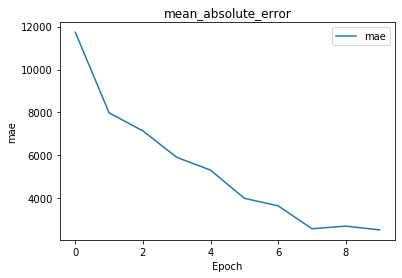

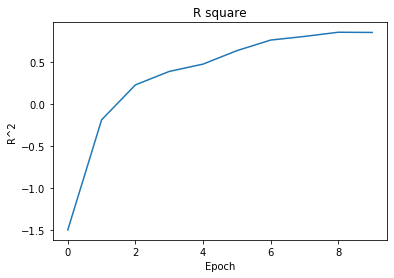

In [94]:
#		3.3.1 학습에 대한 mean_absolute_error 확인.

plot_mae(hist)
plot_r2(hist)

In [60]:
#		3.3.2 trainset에 의한 과거 data의 예측 입국자 count 

predit_y = model.predict([train_x,train_news_x])
predit_y,predit_y.shape

(array([[ 8074.515  ,  8354.514  ,  8255.327  , ...,  9550.548  ,
          9316.286  ,  9750.681  ],
        [10854.818  , 11255.695  , 11124.831  , ..., 12893.48   ,
         12551.671  , 13164.667  ],
        [13703.529  , 14273.492  , 14123.493  , ..., 16320.993  ,
         15902.557  , 16682.844  ],
        ...,
        [  646.8379 ,   683.8448 ,   670.2249 , ...,   363.00415,
           380.6991 ,   406.49942],
        [  622.3507 ,   670.405  ,   654.53723, ...,   361.09918,
           385.42465,   406.40128],
        [  612.9619 ,   655.3562 ,   641.5322 , ...,   363.61865,
           383.185  ,   409.93   ]], dtype=float32),
 (137, 15))

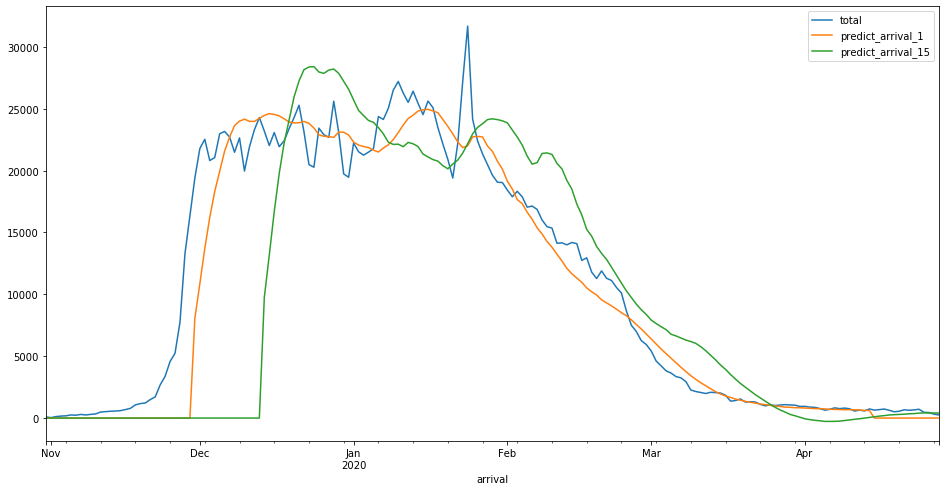

In [61]:
# window와 forecast_days에 의해 실제 날자와 차이나는 부분의 보정 처리...
compare_backdata(predit_y)

In [62]:
# 	3.4  향후 15일 예측
# 		3.4.1 testset (마지막 30일)의 inference

predit_y = model.predict([test_x,test_news_x])
predit_y,predit_y.shape

(array([[442.38434, 477.64963, 481.54333, 449.27155, 440.6347 , 409.30496,
         376.22678, 402.79288, 371.3353 , 384.9697 , 345.33463, 343.8716 ,
         326.17035, 331.80276, 334.6576 ]], dtype=float32),
 (1, 15))

,date,roaming register forecate,immigrantion forecast
0,2020-04-29,442.384338,1843
1,2020-04-30,477.649628,1990
2,2020-05-01,481.543335,2006
3,2020-05-02,449.271545,1871
4,2020-05-03,440.634705,1835
5,2020-05-04,409.304962,1705
6,2020-05-05,376.226776,1567
7,2020-05-06,402.792877,1678
8,2020-05-07,371.335297,1547
9,2020-05-08,384.969696,1604


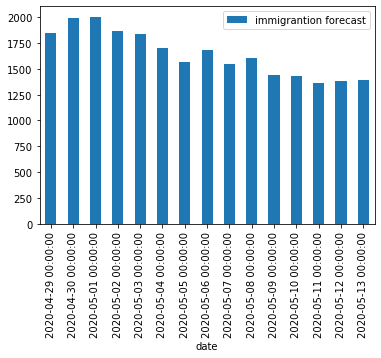

In [63]:
# 		3.4.2 로밍등록자 예측 Count에서 실입국자 보정 처리 및 결과 표출

display_result(predit_y)

In [64]:
#	3.5 ensemble에 의한 일관된 결과 예측
#		3.5.1 ensemble model 생성

# 일관된 예측 결과를 만들기 위해, 동일 모델 10개의 앙상블 처리
# 시간 무지 오래 걸림 식사하고 오세요~
# 밥먹고 왔는데 중간에 실패 (Resource exhaustion) 되어 있을 수 있음...
# 너무 오래 걸리면, epoch=200 을 조정 한다.
import dill

ensemble = []
for i in range(1):
  model,hist = train_combined_model(i+1,epochs=1,verbose=0)
  ensemble.append(model)
    
print("Wait! saving model...")    
file = open("ensemble.mdl", 'wb')
dill.dump(ensemble, file)
file.close()
        
print("Complete!!")


1 th learning attempt
Complete!!


In [70]:
if True == 0:
    print("load from model file...")
    file = open("ensemble.mdl", 'rb')
    ensemble = dill.load(file)
    file.close()

# 		ensemble_predict method define~
def ensemble_predict(input_roam,input_news):

    ensemble_predit_y =  np.asarray([m.predict([input_roam,input_news]) for m in ensemble])
    predit_y = np.mean(ensemble_predit_y,axis=0)
    return predit_y  

In [71]:
# trainset에 의한 과거 data의 예측 입국자 count 

predit_y = ensemble_predict(train_x,train_news_x)
predit_y,predit_y.shape

(array([[ 864.0097 , 1418.3418 ,  993.6089 , ...,  504.06427,  804.33984,
          860.4084 ],
        [1128.7827 , 1898.9573 , 1371.2225 , ...,  639.6049 , 1071.8722 ,
         1133.1467 ],
        [1403.6128 , 2388.478  , 1687.6172 , ...,  769.469  , 1353.3816 ,
         1414.7596 ],
        ...,
        [1065.1903 , 1271.9873 ,  991.97437, ...,  877.8443 ,  916.67236,
          666.9556 ],
        [1016.2932 , 1208.5784 ,  949.848  , ...,  824.7412 ,  875.7437 ,
          630.91486],
        [ 982.5449 , 1153.1052 ,  908.6337 , ...,  780.57605,  849.9281 ,
          598.3703 ]], dtype=float32),
 (137, 15))

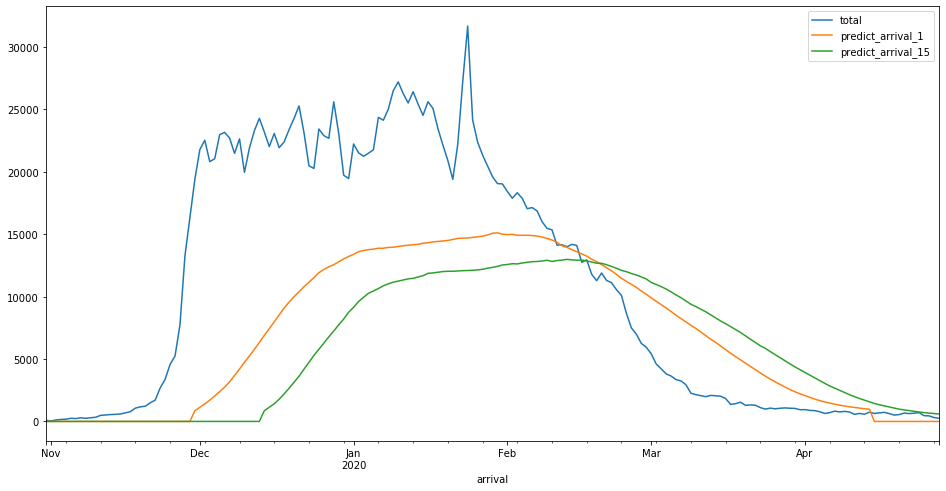

In [72]:
compare_backdata(predit_y)

In [73]:
# 
test_x = test_x.reshape(-1,window,size)
test_news_x = test_news_x.reshape(-1,max_buz_per_day,vec_size,news_window)

predit_y = ensemble_predict(test_x,test_news_x)
predit_y, predit_y.shape

(array([[682.4151 , 709.5459 , 620.25616, 255.07553, 449.54132, 558.4869 ,
         488.46152, 724.5994 , 557.08655, 596.8591 , 696.68146, 423.2028 ,
         453.44028, 647.7956 , 311.1008 ]], dtype=float32),
 (1, 15))

,date,roaming register forecate,immigrantion forecast
0,2020-04-29,682.415100,2843
1,2020-04-30,709.545898,2956
2,2020-05-01,620.256165,2584
3,2020-05-02,255.075531,1062
4,2020-05-03,449.541321,1873
5,2020-05-04,558.486877,2327
6,2020-05-05,488.461517,2035
7,2020-05-06,724.599426,3019
8,2020-05-07,557.086548,2321
9,2020-05-08,596.859070,2486


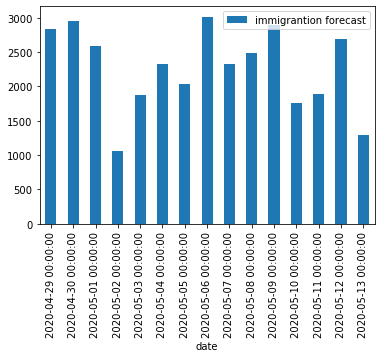

In [74]:
#		3.5.2 최종 결과
display_result(predit_y)